In [1]:
import pandas as pd
df= pd.read_csv('./heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 预处理

In [2]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [3]:
df.duplicated().sum()

0

### 分类特征

1. 分析分类特征（如贫血、糖尿病、高血压等）与死亡事件的关系，使用条形图来表示。  
2. 分析数值特征（如年龄、肌酸激酶水平、射血分数等）与死亡事件的关系，使用箱线图来表示。  
3. 使用热图展示不同特征之间的相关性。

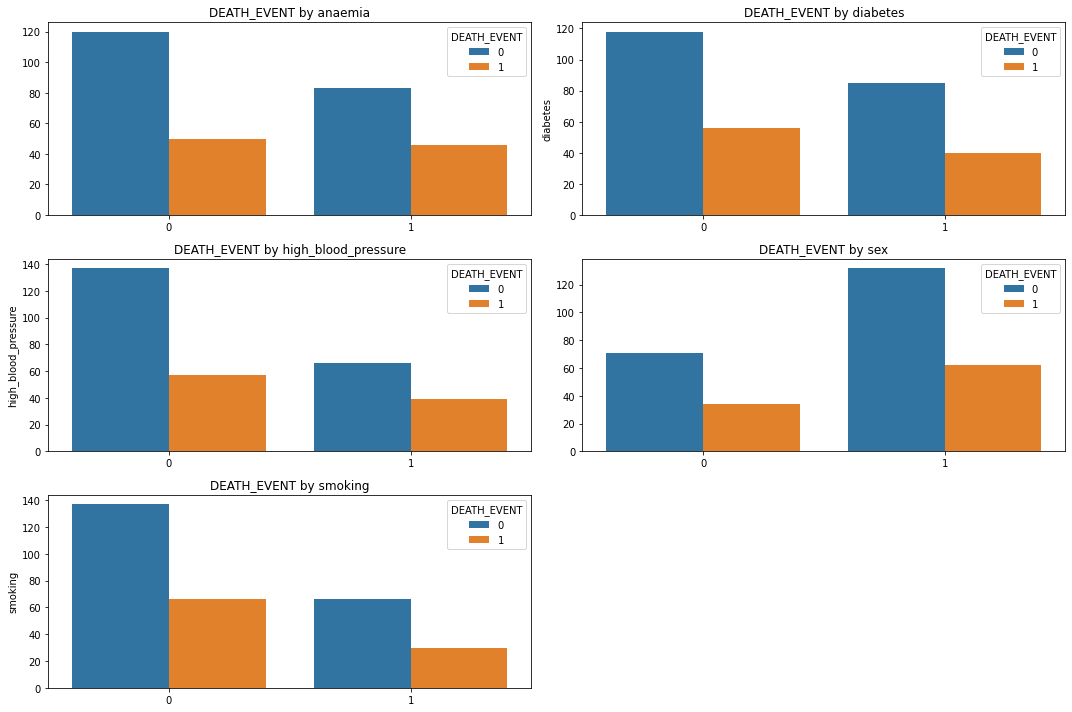

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
cat_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plt.figure(figsize=(15, 10))
for i, column in enumerate(cat_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=column, hue='DEATH_EVENT')
    plt.title(f'DEATH_EVENT by {column}')
    plt.ylabel(column if i % 3 != 1 else '')
    plt.xlabel('DEATH_EVENT' if i >= 6 else '')

plt.tight_layout()
plt.show()

### 数值特征

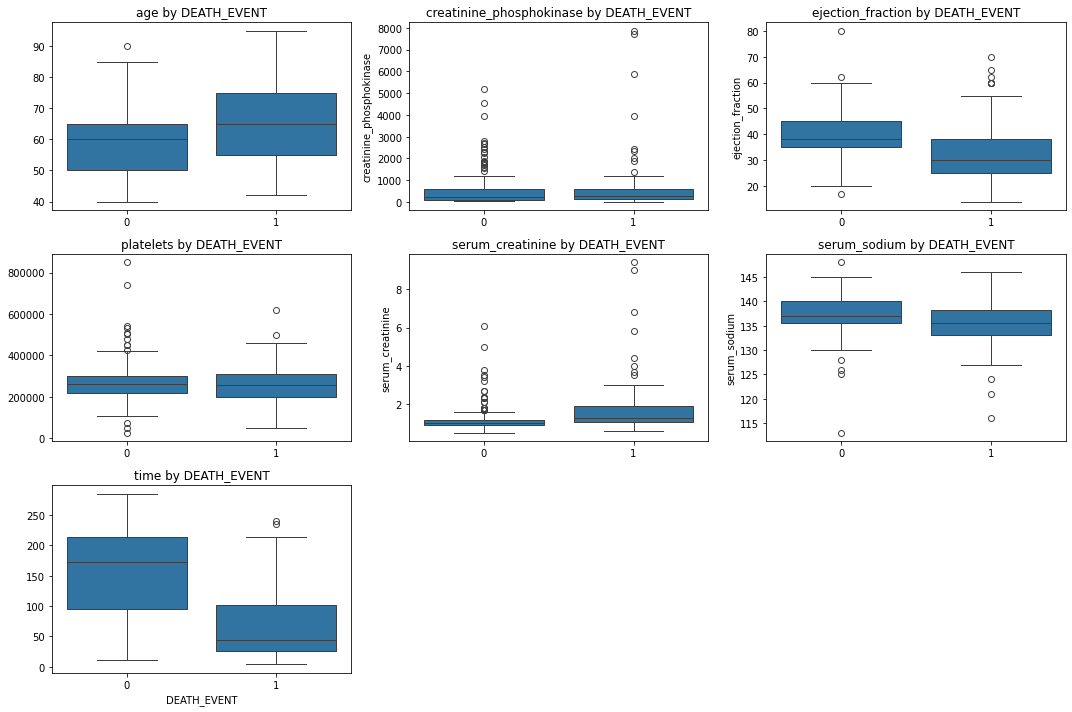

In [5]:
num_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='DEATH_EVENT', y=column)
    plt.title(f'{column} by DEATH_EVENT')
    plt.ylabel(column if i % 3 != 1 else '') 
    plt.xlabel('DEATH_EVENT' if i >= 7 else '')

plt.tight_layout()
plt.show()

### 相关性

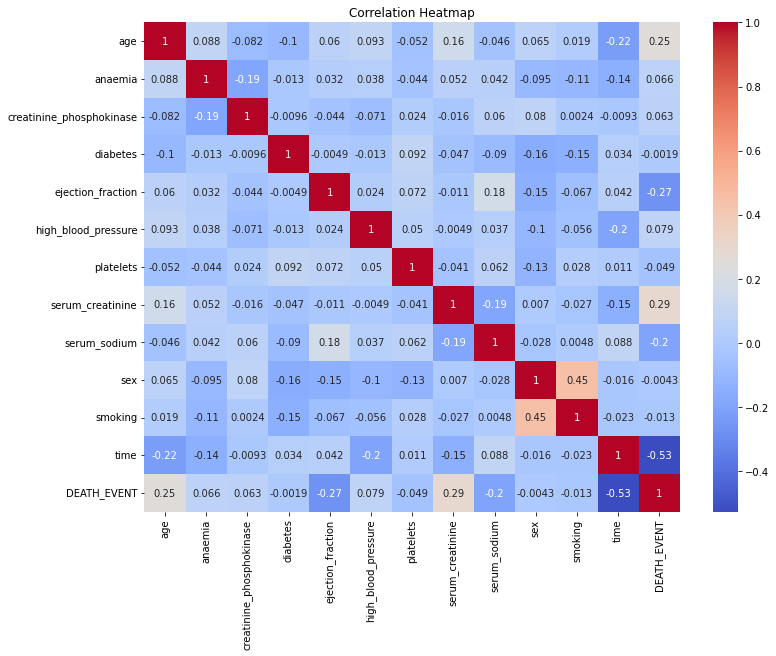

In [8]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 预测模型建立

利用机器学习算法（如逻辑回归、随机森林、支持向量机等）建立预测模型，预测患者心力衰竭的风险。  
评估模型的准确性和泛化能力。

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# 为不同类型的特征定义预处理步骤
numeric_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# 创建包含预处理器和分类器的流水线
pipeline_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                ('classifier', LogisticRegression())])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                ('classifier', RandomForestClassifier())])

pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor),
                ('classifier', SVC())])

# 拟合流水线
pipeline_logreg.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_svm.fit(X_train, y_train)

# 预测并评估模型
y_pred_logreg = pipeline_logreg.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_svm = pipeline_svm.predict(X_test)

# 计算准确率
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

accuracy_logreg, accuracy_rf, accuracy_svm

(0.8, 0.75, 0.7333333333333333)

- 逻辑回归的准确率：80%  
- 随机森林的准确率：73.33%  
- 支持向量机的准确率：73.33%  

逻辑回归在这个数据集上表现最好，但为了更好地评估模型的泛化能力，还可以查看混淆矩阵和分类报告。这将提供关于模型预测的详细信息，包括精确度、召回率和F1分数。  

#### 混淆矩阵和分类报告

In [15]:

def print_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def print_classification_report(y_true, y_pred, model_name):
    print(f'Classification Report for {model_name}:')
    print(classification_report(y_true, y_pred))


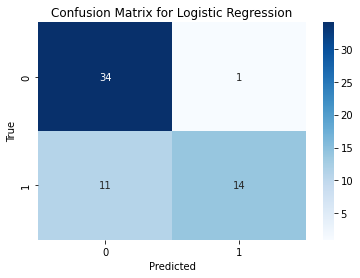

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60



In [16]:
print_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression')
print_classification_report(y_test, y_pred_logreg, 'Logistic Regression')

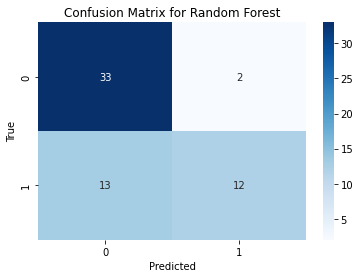

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [17]:
print_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
print_classification_report(y_test, y_pred_rf, 'Random Forest')

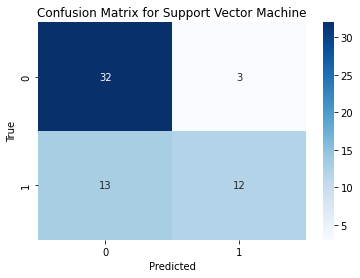

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        35
           1       0.80      0.48      0.60        25

    accuracy                           0.73        60
   macro avg       0.76      0.70      0.70        60
weighted avg       0.75      0.73      0.72        60



In [18]:
print_confusion_matrix(y_test, y_pred_svm, 'Support Vector Machine')
print_classification_report(y_test, y_pred_svm, 'Support Vector Machine')

已经生成了混淆矩阵和分类报告，以更全面地评估每个模型的性能。以下是每个模型的结果：  
1. **逻辑回归**：  
   - 准确率：80%  
   - 混淆矩阵和分类报告显示，模型在预测存活患者（类别0）方面表现较好，但在预测死亡患者（类别1）方面表现稍差。  
2. **随机森林**：  
   - 准确率：73.33%  
   - 混淆矩阵和分类报告与逻辑回归类似，表明模型在预测存活患者方面表现较好，但在预测死亡患者方面表现稍差。  
3. **支持向量机**：  
   - 准确率：73.33%  
   - 混淆矩阵和分类报告与前两种模型相似，表明模型在预测存活患者方面表现较好，但在预测死亡患者方面表现稍差。  
 
这些结果表明，逻辑回归是这个数据集上的最佳模型，尽管所有三个模型都有一定的局限性，特别是在预测死亡患者方面。

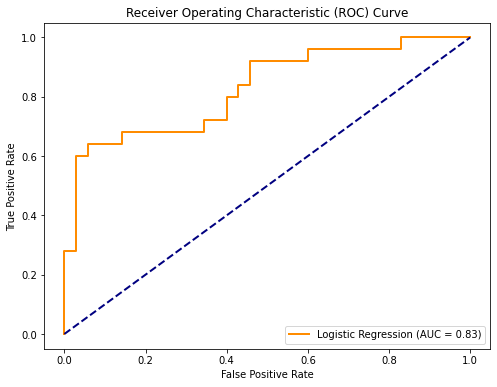

In [20]:
from sklearn.metrics import roc_curve, auc
# 计算逻辑回归的ROC曲线和AUC
y_pred_proba_logreg = pipeline_logreg.predict_proba(X_test)[:, 1]
y_test_int = y_test.astype(int)
# 重新计算逻辑回归的ROC曲线和AUC
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test_int, y_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

这是使用逻辑回归模型计算的ROC曲线。ROC曲线是评估二分类模型性能的常用工具，它展示了模型在不同阈值下的真阳性率（TPR）和假阳性率（FPR）。  
- **曲线下面积（AUC）**：这是ROC曲线的一个重要指标，表示模型的整体性能。逻辑回归模型的AUC值为0.8，表明模型在这个数据集上表现良好。  
- **曲线形状**：曲线上升越陡，表示模型越擅长区分正负样本。  

从图中可以看出，逻辑回归模型在预测心力衰竭风险方面表现不错。  

接下来用真实值和预测值进行对比

In [23]:
# 使用逻辑回归在整个数据集上进行预测
y_pred_logreg_full = pipeline_logreg.predict(df)

# 比较实际值和预测值
comparison_logreg = pd.DataFrame({
    '实际值': df['DEATH_EVENT'],
    '预测值': y_pred_logreg_full
})

# 显示比较结果
comparison_logreg.head(10)

,实际值,预测值
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,0
8,1,0
9,1,1


这是使用逻辑回归模型对整个数据集进行预测的结果，以及实际值和预测值的对比。请注意，由于这个数据集的大小和性质，我们只能显示前几行的结果。  
- **Actual** 列显示了实际发生的死亡事件（1表示死亡，0表示存活）。  
- **Predicted** 列显示了模型预测的死亡事件（1表示预测死亡，0表示预测存活）。  

从显示的这几行数据中，我们可以看到逻辑回归模型在预测实际死亡事件和存活事件方面表现良好。  
